In [4]:
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("plot_ClosureGenFuzzer.csv").set_index("Unnamed: 0")
# dfx = pd.read_csv("plot_MazeFuzzer2.csv").set_index("Unnamed: 0")
# df = pd.concat([df, dfx])
df2 = pd.pivot_table(df,index="Step", columns=["Seed","Param","Fuzz Target"],values="Coverage")
idx =pd.Index( np.logspace(np.log10(2),np.log10(df2.index.max()),2000).round(), dtype=int, name="Step").drop_duplicates(keep="first")
fullidx = df.index.union(idx).drop_duplicates(keep="first")
df2 = df2.reindex(fullidx).fillna(method="ffill").reindex(idx).reset_index()
df2 = df2.melt(id_vars="Step", var_name=["Seed","Param", "Fuzz Target"], value_name="Coverage")
df2

,Step,Seed,Param,Fuzz Target,Coverage
0,2,0,ClosureGenFuzzer,ClosureGenFuzzer,40.0
1,3,0,ClosureGenFuzzer,ClosureGenFuzzer,40.0
2,4,0,ClosureGenFuzzer,ClosureGenFuzzer,40.0
3,5,0,ClosureGenFuzzer,ClosureGenFuzzer,40.0
4,6,0,ClosureGenFuzzer,ClosureGenFuzzer,40.0
...,...,...,...,...,...
38965,55199,9,--experimental_mutator=true ClosureGenFuzzer,ClosureGenFuzzer,17140.0
38966,55482,9,--experimental_mutator=true ClosureGenFuzzer,ClosureGenFuzzer,17140.0
38967,55767,9,--experimental_mutator=true ClosureGenFuzzer,ClosureGenFuzzer,17140.0
38968,56054,9,--experimental_mutator=true ClosureGenFuzzer,ClosureGenFuzzer,17140.0


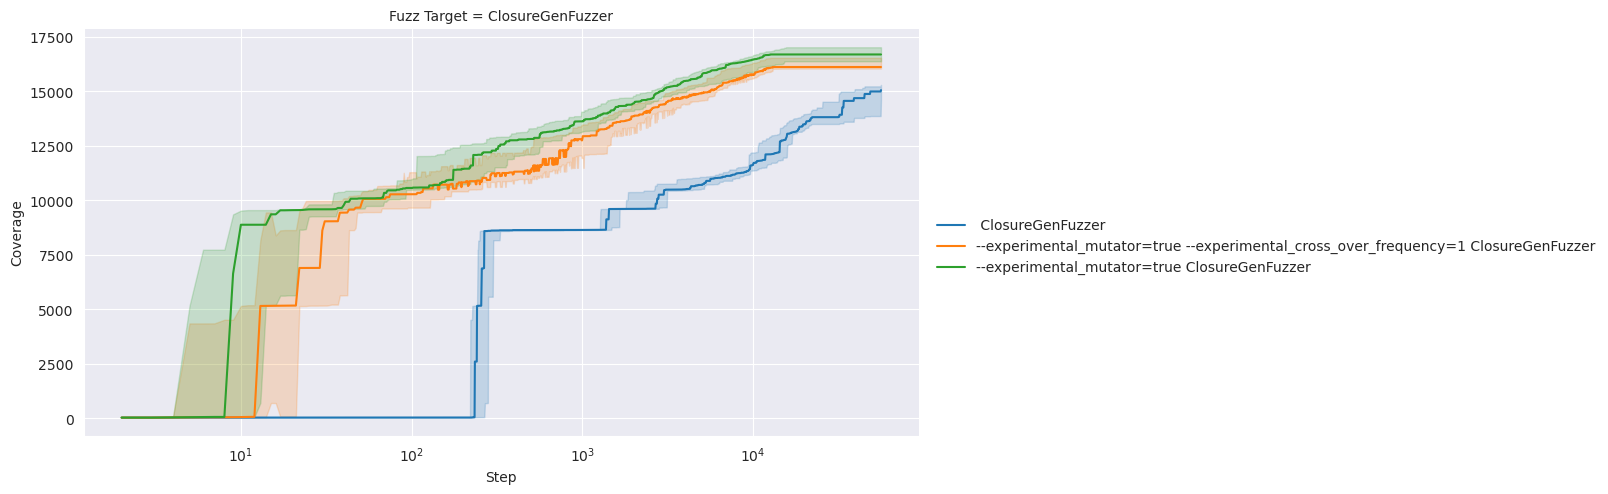

In [5]:
g = sns.FacetGrid(data=df2, row="Fuzz Target", height=5, aspect=2,sharey=False)
g.map(sns.lineplot, "Step", "Coverage","Param", errorbar=("pi", 75), estimator=np.median)
g.set(xscale='log')
g.add_legend()

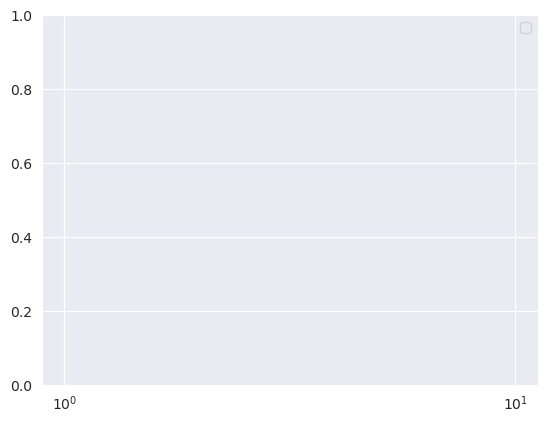

In [8]:
# g = sns.FacetGrid(data=df2, row="Fuzz Target", height=5, aspect=2,sharey=False)
# df2 = df2.loc[df2["Fuzz Target"]=="('ClosureGenFuzzer',)"]
ax = sns.lineplot(df2, x="Step", y="Coverage",hue="Param", style='Seed')
ax.set_xscale('log')
ax.legend("False")
# g.set(xscale='log')
# g.add_legend()